In [1]:
import torch
import torchvision
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [2]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

Processing...
Done!


In [23]:
examples = enumerate(test_loader)
print(examples)
batch_idx, (example_data, example_targets) = next(examples)

In [31]:
print(len(examples))

TypeError: object of type 'enumerate' has no len()

In [24]:
print(batch_idx)

0


In [26]:
print(example_data) #x

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

In [27]:
print(example_targets) #y

tensor([2, 6, 4, 0, 0, 0, 1, 6, 0, 8, 9, 8, 7, 6, 2, 5, 7, 1, 4, 2, 3, 9, 0, 9,
        2, 9, 1, 6, 6, 7, 1, 4, 5, 0, 3, 8, 5, 9, 0, 6, 1, 4, 2, 9, 3, 0, 4, 7,
        2, 3, 0, 9, 0, 1, 1, 0, 4, 7, 1, 9, 4, 2, 2, 7, 9, 1, 8, 0, 9, 5, 2, 9,
        1, 0, 0, 0, 3, 1, 0, 4, 5, 9, 5, 3, 2, 7, 8, 4, 1, 3, 6, 8, 9, 5, 1, 6,
        6, 3, 3, 7, 2, 0, 3, 1, 9, 9, 8, 8, 3, 2, 9, 9, 6, 0, 4, 5, 2, 1, 8, 2,
        5, 8, 1, 1, 6, 4, 7, 6, 1, 2, 1, 8, 1, 6, 2, 8, 4, 8, 8, 7, 9, 7, 4, 8,
        0, 4, 0, 3, 6, 7, 7, 2, 3, 5, 3, 8, 5, 5, 7, 0, 3, 0, 4, 7, 6, 4, 4, 0,
        5, 2, 3, 1, 2, 1, 2, 8, 7, 3, 5, 4, 5, 5, 7, 9, 9, 4, 3, 1, 8, 8, 1, 6,
        1, 1, 8, 7, 6, 3, 9, 8, 4, 5, 1, 6, 0, 9, 4, 4, 0, 2, 9, 8, 4, 2, 0, 8,
        3, 8, 6, 3, 5, 4, 7, 6, 3, 7, 4, 3, 4, 8, 0, 1, 9, 3, 2, 2, 8, 9, 1, 3,
        7, 8, 1, 5, 7, 2, 7, 1, 0, 7, 8, 8, 3, 8, 8, 3, 2, 8, 4, 3, 3, 3, 0, 1,
        4, 4, 2, 8, 3, 3, 0, 0, 8, 4, 1, 5, 8, 4, 5, 8, 2, 9, 4, 9, 7, 4, 3, 3,
        1, 6, 8, 8, 1, 1, 6, 8, 9, 4, 0,

In [4]:
example_data.shape

torch.Size([1000, 1, 28, 28])

In [29]:
example_targets.shape

torch.Size([1000])

In [5]:
type(example_data)

torch.Tensor

In [32]:
batch_idx, (example_data, example_targets) = next(examples)
print(batch_idx)

1


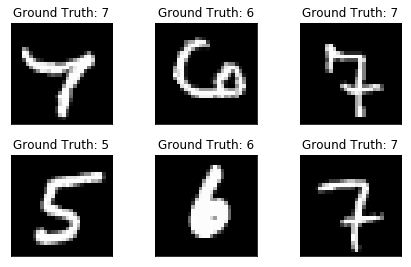

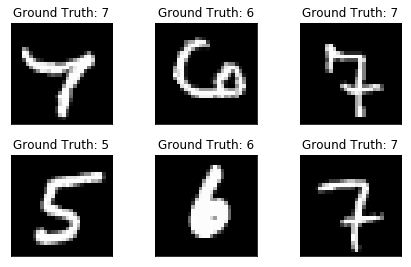

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [16]:
network = Net()
#network.cuda()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [12]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [18]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      #torch.save(network.state_dict(), '/results/model.pth')
      #torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [19]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [20]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

c:\users\leo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
c:\users\leo\appdata\local\programs\python\python36\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3024, Accuracy: 1009/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303525
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.267654
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.282942
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.226078
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.191179
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.158659
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.134054
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.087886
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.078272
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.851918
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.923211
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.802145
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.544863
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.519731
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.384291
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.342506
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.251101
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.272088
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.357343
Train Epoch: 1 [12160